In [5]:
from fastai.basics import *
import numpy as np
import matplotlib.pyplot as plt

In [6]:
input = torch.rand(100,1,requires_grad=True, dtype=torch.float32)
reals = input**2
#reals = np.log(input.detach().numpy())
#reals = torch.FloatTensor(reals)

In [ ]:
#m1 = nn.Linear(1,10)
#m2 = nn.Linear(10,1)

In [7]:
class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear(1,20, bias=True)
    self.lin2 = nn.Linear(20,50, bias=True)
    self.lin3 = nn.Linear(50,100, bias=True)
    self.lin4 = nn.Linear(100,1, bias=True)

  def forward(self, xb):
    x = self.lin1(xb)
    x = torch.atan(x)
    x = self.lin2(x)
    x = torch.atan(x)
    x = self.lin3(x)
    x = torch.atan(x)
    return self.lin4(x)

In [8]:
m = MyModel()
loss = nn.MSELoss()

In [9]:
optimizer = torch.optim.Adam(m.parameters(),0.001)

In [ ]:
#output = m(input).sum()
#torch.autograd.grad(output,input,retain_graph=True)

In [10]:
for epoch in range(10000):
    y_pred = m(input)
    l = loss(reals, y_pred)
    d=torch.autograd.grad(y_pred,input,grad_outputs=torch.ones_like(y_pred),retain_graph=True)
    #d=torch.autograd.grad(y_pred,input,grad_outputs=y_pred.data.new(y_pred.shape).fill_(1),retain_graph=True)
    l.backward(create_graph=True)
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 1000 == 0:
        print(f'epoch {epoch+1}: loss = {l:.8f}' )
        type(l)
        #print(input.grad)
        #print(d)


/Users/jorgedelgado/Library/Python/3.9/lib/python/site-packages/torch/autograd/graph.py:744: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/engine.cpp:1208.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


epoch 1: loss = 0.16249228
epoch 1001: loss = 0.00001963
epoch 2001: loss = 0.00001367
epoch 3001: loss = 0.00002779
epoch 4001: loss = 0.00000701
epoch 5001: loss = 0.00000606
epoch 6001: loss = 0.00000511
epoch 7001: loss = 0.00000386
epoch 8001: loss = 0.00000313
epoch 9001: loss = 0.00000276


1.4469435214996338
1.4446806907653809


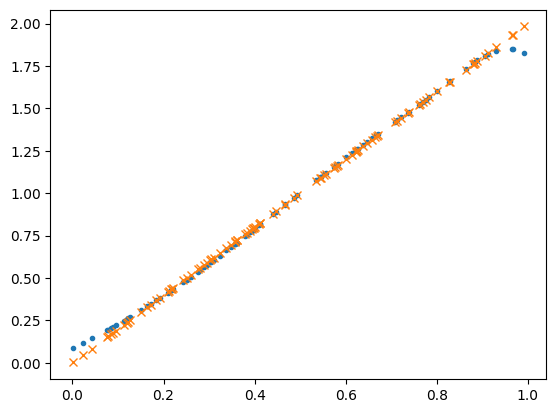

In [11]:
n=99
dlist=list(d)
print(dlist[0][n].item())
print(2*input[n].item())
plt.plot(input.detach(),dlist[0][:],'.',input.detach(),input.detach()*2,'x')

In [12]:
m(torch.tensor([2], dtype=torch.float32)).item()

1.6838109493255615

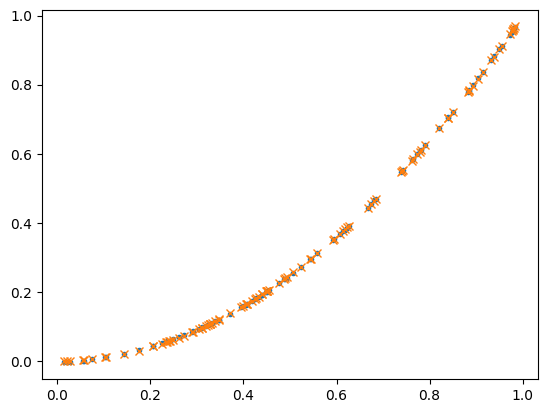

In [13]:
x_test=torch.rand(100,1, dtype=torch.float32)
y_test=m(x_test)
plt.plot(x_test.detach(),y_test.detach(),'.',x_test.detach(),x_test.detach()**2,'x')
plt.show()

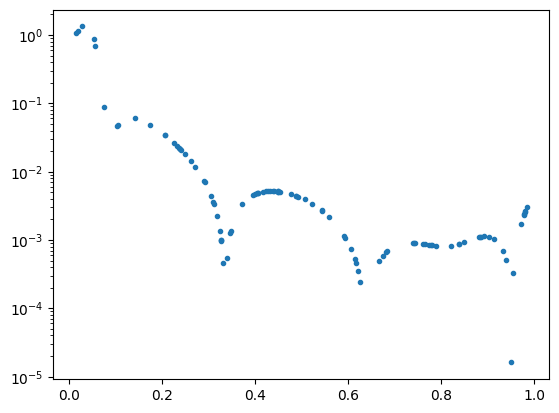

In [14]:
plt.plot(x_test.detach(),np.abs(1 - x_test.detach()**2/y_test.detach()),'.')
plt.yscale('log')
plt.show()